# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/1_gluoncv_finetune/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Parent_Directory (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# About the Network

1. Blog 1 on VGG Network - https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c

2. Blog 2 on VGG Network - https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

3. Blog 1 on SSD - https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11

4. Blog 2 on SSD - https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab

5. Blog on Atrous Convolution - https://towardsdatascience.com/review-deeplabv1-deeplabv2-atrous-convolution-semantic-segmentation-b51c5fbde92d

6. Reference Tutorial - https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html

In [1]:
import os
import sys
sys.path.append("../../1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

# Sample Dataset Credits

- credits: https://github.com/experiencor/kangaroo

In [4]:
root = "../sample_dataset/kangaroo/";                         
img_dir = "Images/";                                                     
anno_file = "train_labels.csv";
batch_size=4;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

In [6]:
pretrained = True;         
gpu=True;
model_name = "ssd_300_vgg16_atrous_coco";  

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

In [8]:
gtf.Set_Learning_Rate(0.001);

In [9]:
epochs=10;
params_file = "saved_model.params";

In [10]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.833 samples/sec, CrossEntropy=16.996, SmoothL1=0.590
[Epoch 0][Batch 20], Speed: 9.281 samples/sec, CrossEntropy=5.124, SmoothL1=1.451
[Epoch 0][Batch 40], Speed: 12.119 samples/sec, CrossEntropy=4.166, SmoothL1=1.459
[Epoch 1][Batch 0], Speed: 11.651 samples/sec, CrossEntropy=2.960, SmoothL1=1.512
[Epoch 1][Batch 20], Speed: 6.632 samples/sec, CrossEntropy=2.819, SmoothL1=1.012
[Epoch 1][Batch 40], Speed: 16.797 samples/sec, CrossEntropy=2.750, SmoothL1=0.954
[Epoch 2][Batch 0], Speed: 13.261 samples/sec, CrossEntropy=2.599, SmoothL1=0.690
[Epoch 2][Batch 20], Speed: 8.633 samples/sec, CrossEntropy=2.547, SmoothL1=0.826
[Epoch 2][Batch 40], Speed: 11.700 samples/sec, CrossEntropy=2.469, SmoothL1=0.757
[Epoch 3][Batch 0], Speed: 11.902 samples/sec, CrossEntropy=2.446, SmoothL1=0.934
[Epoch 3][Batch 20], Speed: 13.281 samples/sec, CrossEntropy=2.274, SmoothL1=0.681
[Epoch 3][Batch 40], Speed: 14.417 samples/sec, CrossEntropy=2.259, SmoothL1=0.693
[Epoch 4][B

# Running Inference

In [1]:
import os
import sys
sys.path.append("../../1_gluoncv_finetune/lib/");

In [11]:
from inference_prototype import Infer

In [12]:
model_name = "ssd_300_vgg16_atrous_coco";
params_file = "saved_model.params";
class_list = ["kangaroo"];

In [13]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

In [18]:
img_name = "../sample_dataset/kangaroo/test/kg4.jpeg"; 
visualize = True;
thresh = 0.85;

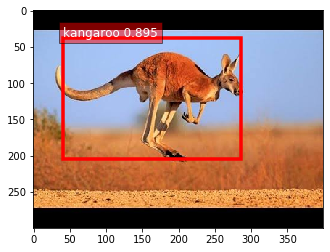

In [19]:
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

# Author - Tessellate Imaging - https://www.tessellateimaging.com/

# Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning


## Monk features
   - low-code
   - unified wrapper over major deep learning framework - keras, pytorch, gluoncv
   - syntax invariant wrapper

## Enables

    - to create, manage and version control deep learning experiments
    - to compare experiments across training metrics
    - to quickly find best hyper-parameters

## At present it only supports transfer learning, but we are working each day to incorporate

    - GUI based custom model creation
    - various object detection and segmentation algorithms
    - deployment pipelines to cloud and local platforms
    - acceleration libraries such as TensorRT
    - preprocessing and post processing libraries


## To contribute to Monk AI or Monk Object Detection repository raise an issue in the git-repo or dm us on linkedin

    - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    - Akash - https://www.linkedin.com/in/akashdeepsingh01/

